In [1]:
from unicodedata import name
import torch

In [2]:
#labels all bigram chars, enumerates them, and sorts them backwards(most occuring first)
names = open("names.txt" , "r").read().splitlines()
b = {}
for w in names:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
sorted(b.items(),key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [3]:
#stoi = dict. of char:num - 1->26, with 0 being .
#itos = dict. of num:chars - 1->26, with 0 being .

chars = sorted(list(set(''.join(names))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [4]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [5]:
#creates an torch array labeled with all instances of bigrams (including start and end)
N = torch.zeros((27,27), dtype = torch.int32)
for w in names:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

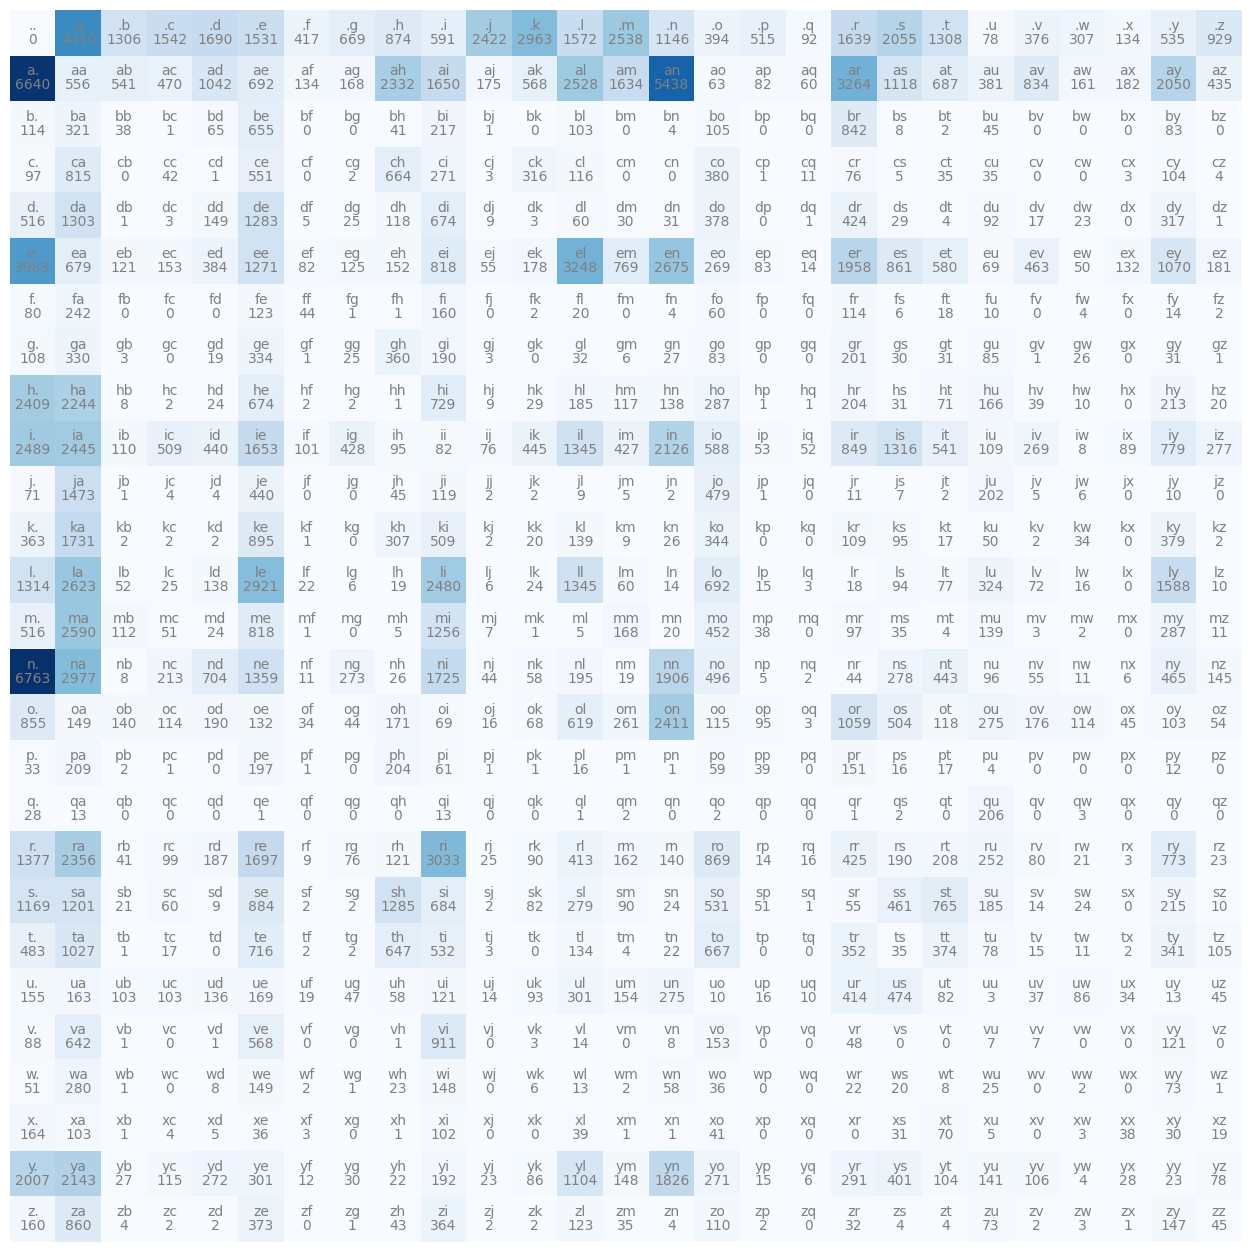

In [6]:
#matplotlib graph for torch
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range (27):
    for j in range (27):
        chstr = itos[i] + itos[j]
        #cosmetics
        plt.text(j,i,chstr,ha = "center", va = "bottom", color='gray')
        plt.text(j,i,N[i,j].item(),ha = "center", va = "top", color='gray')
plt.axis('off')

In [7]:
p = N[0].float()
p = p / p.sum()

g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [8]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

(-0.5, 26.5, 26.5, -0.5)

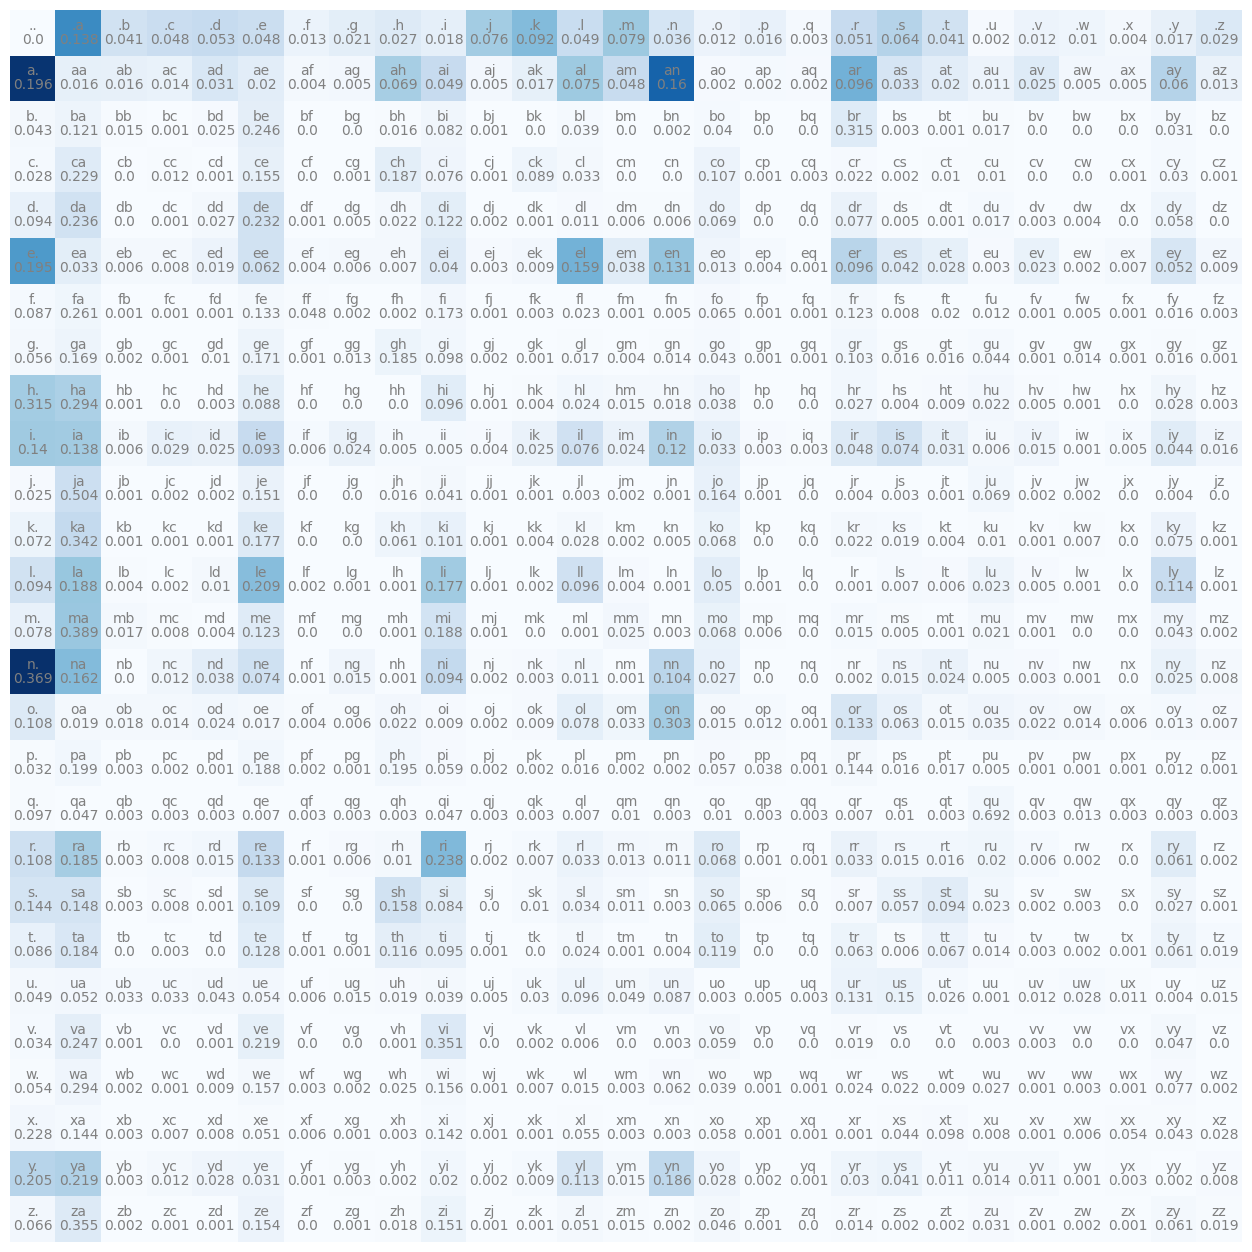

In [9]:
#matplotlib graph for torch
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range (27):
    for j in range (27):
        chstr = itos[i] + itos[j]
        #cosmetics
        plt.text(j,i,chstr,ha = "center", va = "bottom", color='gray')
        plt.text(j,i,float("{:.3f}".format(P[i,j].item())),ha = "center", va = "top", color='gray')
plt.axis('off')

In [10]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [59]:
log_likelihood = 0
n = 0
for w in names:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood+=log_prob
        nll = -log_likelihood
print(P[ix1,ix2])
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

tensor(0.2279)
log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
inf


In [67]:
#all first letters of bigrams => xs[], all second letters => ys[]
xs, ys = [], []

for w in names[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    #print(ch1,ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [68]:
xs

tensor([ 0,  5, 13, 13,  1])

In [69]:
ys

tensor([ 5, 13, 13,  1,  0])

In [70]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
#x values but one hot encoded (binary)
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

torch.Size([5, 27])


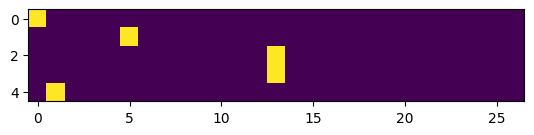

In [71]:
print(xenc.shape)
plt.imshow(xenc) #(x,y) -> (value, index)

In [72]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27),generator=g, requires_grad=True)
(xenc  @ W) #shows the firing rate of each neuron on each of 5 inputs
#wx
#(xenc @ W)[3,13]
#output of 13th neuron, given 3rd input
#fed in all 5 inputs into same neuron, to all neurons

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9644e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2844e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4040e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0731e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2198e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [73]:
#***FORWARD PASS
#xenc @ W are interpreted to give LOG counts because some numbers are negative(due to randn)
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent to N but trash(for now) // Needed to exp() to get rid of negative numbers
probs = counts / counts.sum(1, keepdims=True) #Normalizing to get probabilities
#probability for each (using trash "counts")
loss = -probs[torch.arange(5) , ys].log().mean() #vectorized form of negative log likelihood
loss.item() #How is loss a differentiable function? Relation between tensor and function? Luckily I answered this when I built the framework.

3.7693049907684326

In [74]:
#***BACKPROPAGATION
W.grad = None
loss.backward()
W.grad #every element tells us the influence of that weight of the loss function (slope)

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [75]:
W.data = -100.1*W.grad

In [116]:
# create the dataset
xs, ys = [], []
for w in names[:10]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1] # 1-26, which number in the alphabet is it?
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs)
print(ys.numel())
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)


tensor([ 0,  5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9,
        19,  1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0,  3,  8,  1,
        18, 12, 15, 20, 20,  5,  0, 13,  9,  1,  0,  1, 13,  5, 12,  9,  1,  0,
         8,  1, 18, 16,  5, 18,  0,  5, 22,  5, 12, 25, 14])
67
number of examples:  67


In [117]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encodin
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character, SOFTMAX
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
                # 0 to nelem,  and their corresponding labels
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -100 * W.grad


3.7210230827331543
2.40541934967041
1.9239165782928467
2.2249536514282227
1.7245550155639648
1.9426865577697754
1.6295186281204224
1.9079850912094116
1.8093069791793823
2.2800257205963135
1.7678948640823364
1.8818793296813965
1.5778272151947021
1.9245010614395142
1.7695993185043335
2.2499520778656006
1.6651450395584106
1.7233939170837402
1.9153776168823242
1.9449905157089233
1.9068825244903564
2.3351829051971436
1.7535574436187744
1.6197314262390137
1.7173149585723877
1.9278788566589355
1.835591435432434
2.3234241008758545
1.7178871631622314
1.7185431718826294
1.919153094291687
1.9525952339172363
1.9035351276397705
2.3361635208129883
1.7373268604278564
1.5714325904846191
1.4426546096801758
1.6212929487228394
1.985783576965332
2.0885276794433594
1.8158538341522217
2.123518943786621
1.5580854415893555
1.5073639154434204
1.4818261861801147
1.8294810056686401
1.619262456893921
2.0786778926849365
1.5502128601074219
1.7407854795455933
1.8151450157165527
2.126840829849243
1.6229840517044067
1

In [95]:
for i in range(10):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float() # input to the network: one-hot encoding
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        probs = counts / counts.sum(1, keepdims=True) # probabilities for next character given last, SOFTMAX for for each row
        
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0: 
            break
    print(''.join(out))

jigua.
sadryrolyiniydavesole.
rish.
be.
ka.
nnn.
mas.
t.
arze.
brylonliymen.
